In [3]:
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format
# pd.options.display.int_format ='{:,}'.format

import os
from operator import itemgetter    
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')


## Exploring Surgery Characteristics

**Purpose**:   
The purpose of this section is to understand and idenify parameters related to the operations. 

**Deliverables**:
1. List of Top X surgeries by volume. 
2. List of surgeries with greatest count of LOS outliers. 

**Out of scope:**
- Patient demographic and clinical value features are not considered. 



In [5]:
import_csv_file = '../_data/operations_fulldata_nodup.csv'
df = pd.read_csv(import_csv_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128031 entries, 0 to 128030
Data columns (total 58 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   op_id              128031 non-null  int64  
 1   subject_id         128031 non-null  int64  
 2   hadm_id            128031 non-null  int64  
 3   opdate             128031 non-null  int64  
 4   age                128031 non-null  int64  
 5   sex                128031 non-null  object 
 6   weight             126611 non-null  float64
 7   height             127269 non-null  float64
 8   race               128031 non-null  object 
 9   asa                124636 non-null  float64
 10  emop               128031 non-null  int64  
 11  department         128031 non-null  object 
 12  antype             128031 non-null  object 
 13  icd10_pcs          128031 non-null  object 
 14  category_desc      128031 non-null  object 
 15  desc_short         128031 non-null  object 
 16  ca

In [7]:
# calculate teh operation durations and add to DF
df['op_duration']=df['orout_time']-df['orin_time']
df['LOS']=(df['discharge_time']-df['orout_time'])/1440 # LOS is time following surgery to dishcarge converted to days. 
operations_info = df.loc[:,['op_id','category_id','category_desc','desc_short', 'icd10_pcs', 'orin_time','orout_time', 'op_duration', 'LOS']]

operations_info.describe()



,op_id,orin_time,orout_time,op_duration,LOS
count,"128,031","128,031","128,031","128,031","128,031"
mean,"450,192,376","222,562","222,725",163,7
std,"28,903,454","661,518","661,511",127,27
min,"400,000,455",-20,60,10,-3
25%,"425,134,311","2,070","2,210",80,2
50%,"450,328,079","3,340","3,490",130,4
75%,"475,282,061","10,590","10,690",210,7
max,"499,999,032","5,185,065","5,185,170","13,125","3,728"


In [8]:

operations_pivot = pd.pivot_table(
        operations_info, 
        values=['op_id','op_duration'],
        index=['category_id','category_desc', 'icd10_pcs','desc_short'],
        aggfunc={'op_id':'count','op_duration':'mean'} )
operations_pivot = operations_pivot.sort_values(by='op_id', ascending=False)

operations_pivot



op_duration  \
category_id category_desc           icd10_pcs desc_short                                                  
08D         Eye                     08DJ3     Extraction of Right Lens                               50   
09Q         Ear                     09Q70     Repair Right Tympanic Membrane                        138   
08R         Eye                     08R43     Replacement of Right Vitreous with Autol Sub           84   
0HB         Skin and Breast         0HBT0     Excision of Right Breast                              116   
0GT         Endocrine System        0GTK0     Resection of Thyroid Gland                            161   
...                                                                                                 ...   
0BQ         Respiratory System      0BQF4     Repair Right Lower Lung Lobe                          365   
0PS         Upper Bones             0PSJ3     Reposition Left Radius with Int Fix                   550   
                                    0PSJX     Reposition Left Radius                                605   
0BR         Respiratory System      0BR10     Replacement of Trachea with Autol Sub                 145   
0D9         Gastrointestinal System 0D9J4     Drainage of Appendix with Drain Dev                   295   

                                                                                            op_id  
category_id category_desc           icd10_pcs desc_short                                           
08D         Eye                     08DJ3     Extraction of Right Lens                       6906  
09Q         Ear                     09Q70     Repair Right Tympanic Membrane                 4178  
08R         Eye                     08R43     Replacement of Right Vitreous with Autol Sub   3371  
0HB         Skin and Breast         0HBT0     Excision of Right Breast                       3190  
0GT         Endocrine System        0GTK0     Resection of Thyroid Gland                     2982  
...                                                                                           ...  
0BQ         Respiratory System      0BQF4     Repair Right Lower Lung Lobe                      1  
0PS         Upper Bones             0PSJ3     Reposition Left Radius with Int Fix               1  
                                    0PSJX     Reposition Left Radius                            1  
0BR         Respiratory System      0BR10     Replacement of Trachea with Autol Sub             1  
0D9         Gastrointestinal System 0D9J4     Drainage of Appendix with Drain Dev               1  

[1609 rows x 2 columns]

In [9]:
## Reduce the scope of the data frame to include the Top X surgeries. 

TOP_X_SURGERIES = 20

# This will count occurrences of each 'icd10_pcs' code
counts = operations_info[['category_id','category_desc']].value_counts()

# # Take the top 100 most common 'icd10_pcs' codes
top_surg_summary_df = pd.DataFrame(counts.head(TOP_X_SURGERIES))

top_surg_summary_df


,,count
category_id,category_desc,
08R,Eye,7960
0HB,Skin and Breast,7016
08D,Eye,6995
09Q,Ear,6402
0DT,Gastrointestinal System,4911
09B,Ear,4860
0TB,Urinary System,4365
0FT,Hepatobiliary System and Pancreas,3979
0GT,Endocrine System,3959


In [11]:
## Export List of PCD codes with greatest VOLUME to CSV

# EXPORT and Specify the file path 
output_csv_file = '../_data/category_VOL.csv'

# Save the DataFrame to a CSV file
top_surg_summary_df.to_csv(output_csv_file, index=True)

### Outcome:
  * `top_surg_summary_df` is the list of Top X surgeries by volume/count

### Histogram of surgery types

In [10]:
## Create a filtered data set bason on the number of targeted pcs codes  

counts = operations_info['category_id'].value_counts()

# Get the top 100 codes
top_codes = counts.head(TOP_X_SURGERIES).index

# Now, filter the DataFrame to these top 100 codes
top_100_df = operations_info[operations_info['category_id'].isin(top_codes)]

# Next, group by the 'PCD_description' and count the occurrences
description_counts = top_100_df.groupby('category_desc').size().sort_values(ascending=False)



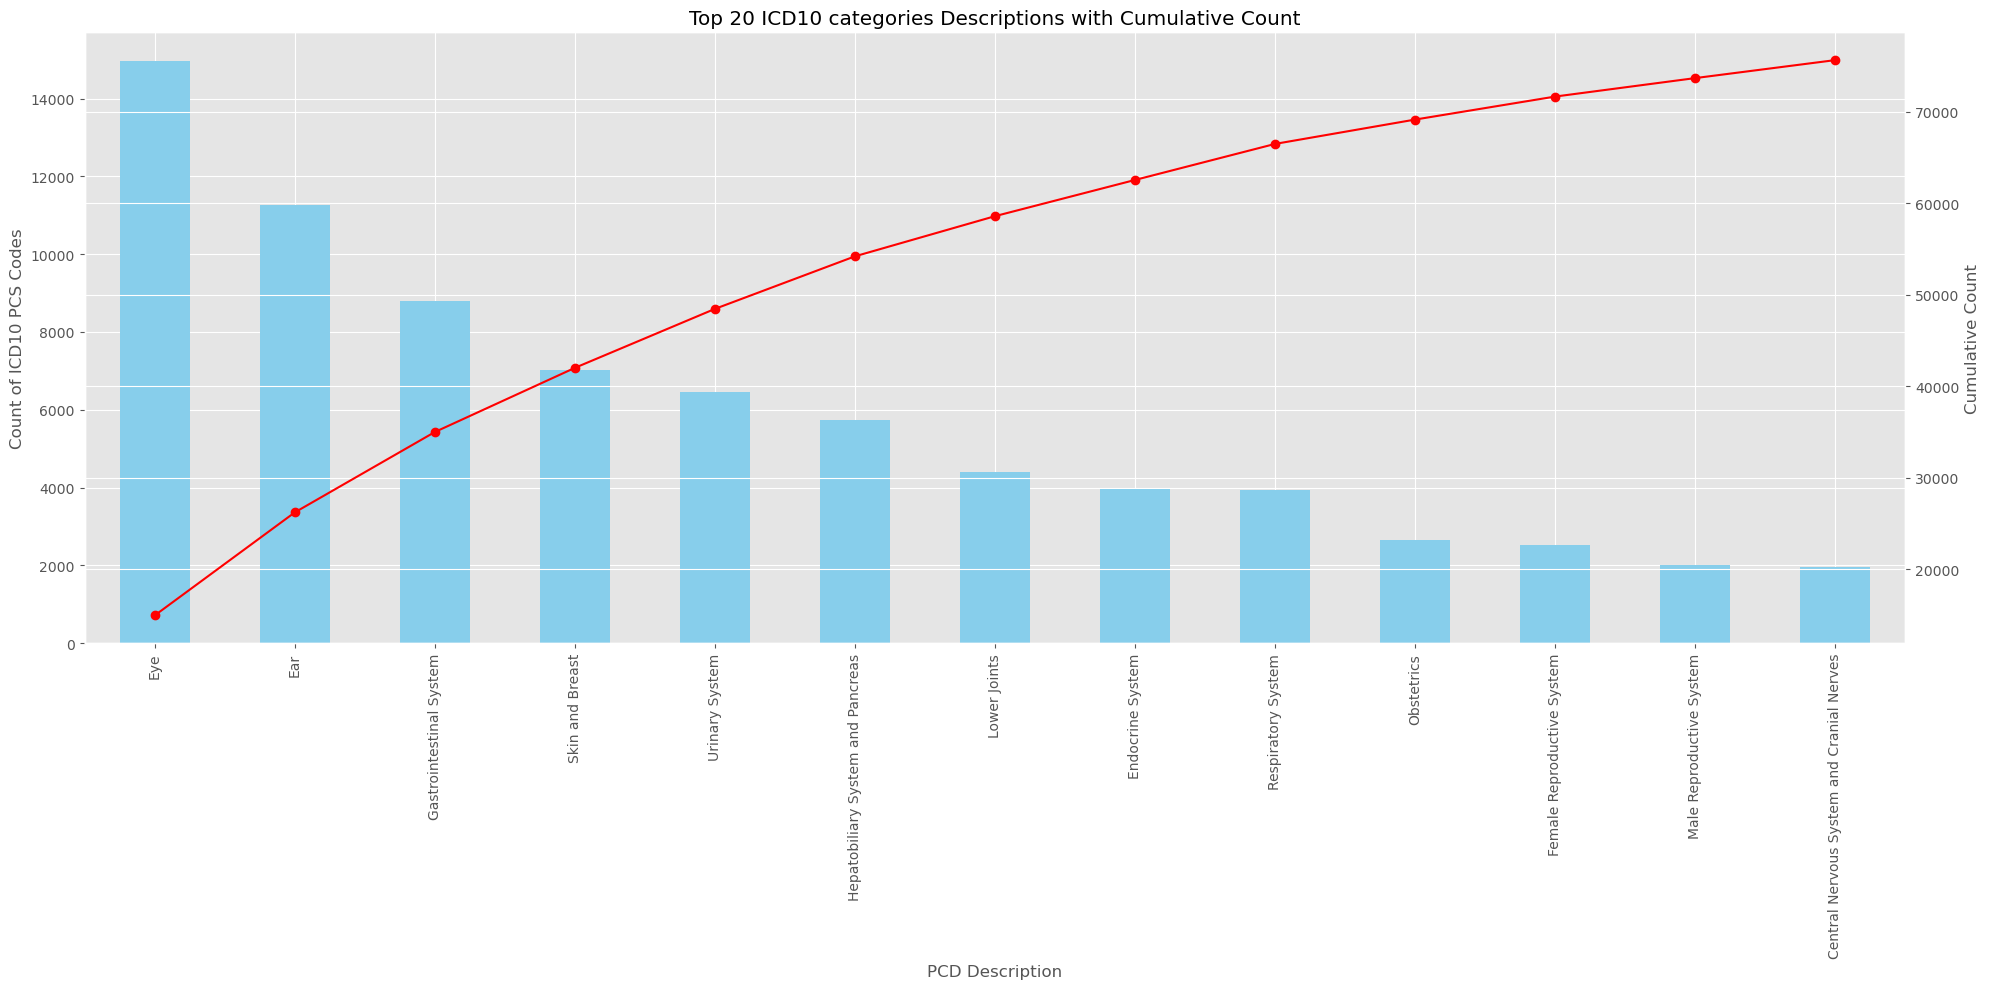

In [11]:

# Now plot the bar chart using these counts
fig, ax1 = plt.subplots(figsize=(20, 10))  # Adjust the size as needed

# Bar chart for the count of each PCD_description
description_counts.plot(kind='bar', color='skyblue', ax=ax1)

# Labels and titles
ax1.set_title(f'Top {TOP_X_SURGERIES} ICD10 categories Descriptions with Cumulative Count')
ax1.set_xlabel('PCD Description')
ax1.set_ylabel('Count of ICD10 PCS Codes')

# Rotate the descriptions for better readability
ax1.tick_params(axis='x', rotation=90)

# Create a secondary y-axis for the cumulative count
ax2 = ax1.twinx()

# Calculate the cumulative sum and plot as a line on the secondary y-axis
description_counts.cumsum().plot(kind='line', color='red', ax=ax2, marker='o')

# Secondary y-axis label
ax2.set_ylabel('Cumulative Count')

# Make sure layout is tight so labels don't get cut off
fig.tight_layout()

# Show plot with a grid for the secondary y-axis
ax2.grid(True)

plt.show()